In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import matplotlib.pyplot as plt
import random
import math
import torch
import tensorflow as tf
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm
from torch import optim 
from sklearn.metrics import accuracy_score ,  confusion_matrix , ConfusionMatrixDisplay , roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

data_x = loadmat('/content/Thyroid_feature_space.mat')
data_y = loadmat('/content/Thyroid_labels.mat')

In [ ]:
data_x = data_x['Thyroid_combined_feature_space']
data_y = data_y['Thyroid_target']
np.unique(data_y)

array([1, 2, 3], dtype=uint8)

In [ ]:
print(data_x.shape,data_y.shape)

(1355, 29) (1355, 1)


In [ ]:
train_x ,  test_x , train_y , test_y = train_test_split(data_x,data_y ,train_size = 0.7, shuffle= True)

In [ ]:
test_1 = test_y
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(948, 29) (948, 1) (407, 29) (407, 1)
(948, 29) (948, 4) (407, 29) (407, 4)


In [ ]:
train_y = train_y[:,1:]
test_y = test_y[:,1:]

In [ ]:
# train_x =  torch.from_numpy(train_x).float()
# test_x =  torch.from_numpy(test_x).float()
# train_y =  torch.from_numpy(train_y).float()
# test_y =  torch.from_numpy(test_y).float()

In [ ]:
model=Sequential()

model.add(Dense(512, activation='relu',input_shape=[29,]))
model.add(Dense(512, activation='relu',input_shape=[512,]))
model.add(Dense(512, activation='relu',input_shape=[512,]))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# model = NeuralNetwork()
# num_epochs = 20
# loss_function = nn.BCELoss()
# learning_rate = 0.001
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)
model.fit(x=train_x,y = train_y,validation_data=(test_x,test_y),epochs=50)

Epoch 1/50
30/30 [==============================] - 2s 55ms/step - loss: 4.0634 - accuracy: 0.5812 - val_loss: 0.7230 - val_accuracy: 0.7027
Epoch 2/50
30/30 [==============================] - 0s 12ms/step - loss: 0.7177 - accuracy: 0.7141 - val_loss: 0.7305 - val_accuracy: 0.6265
Epoch 3/50
30/30 [==============================] - 0s 11ms/step - loss: 0.7234 - accuracy: 0.7089 - val_loss: 0.7121 - val_accuracy: 0.7002
Epoch 4/50
30/30 [==============================] - 0s 10ms/step - loss: 0.7038 - accuracy: 0.7205 - val_loss: 0.6667 - val_accuracy: 0.7494
Epoch 5/50
30/30 [==============================] - 0s 11ms/step - loss: 0.6681 - accuracy: 0.7500 - val_loss: 0.5677 - val_accuracy: 0.7518
Epoch 6/50
30/30 [==============================] - 0s 10ms/step - loss: 0.6122 - accuracy: 0.7595 - val_loss: 0.6543 - val_accuracy: 0.7445
Epoch 7/50
30/30 [==============================] - 0s 12ms/step - loss: 0.5924 - accuracy: 0.7679 - val_loss: 0.5856 - val_accuracy: 0.8010
Epoch 8/50
30

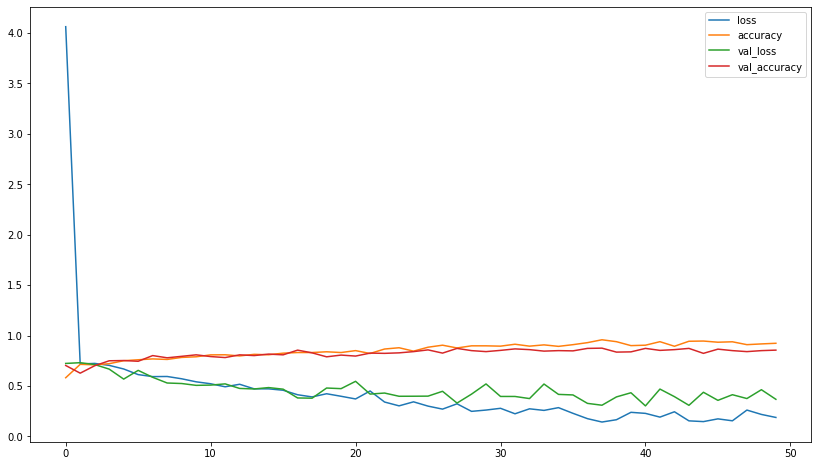

In [ ]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(14,8))

In [ ]:
predictions=np.argmax(model.predict(test_x), axis=-1)
# predictions = model.predict_proba(test_x)
predictions

array([0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2, 1, 0,
       1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 2, 0, 2, 1, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 2, 1, 2, 0,
       2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2,
       2, 1, 0, 1, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 2,
       0, 1, 1, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1,
       2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 1,

In [ ]:
model.evaluate(test_x,test_y,verbose=0)

[0.6398451924324036, 0.828009843826294]

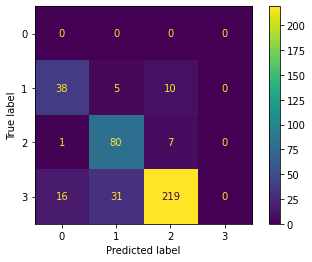

In [ ]:
cm_rbf = confusion_matrix(test_1, predictions)
disp_rbf = ConfusionMatrixDisplay(cm_rbf)
disp_rbf.plot()
plt.show()

In [ ]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [ ]:
perf_measure(test_1,predictions)

(5, 111, 0, 55)

In [ ]:
specificity  =  5 / (5 + 55)
specificity  = specificity*10

0.8333333333333333

In [ ]:
sensitivity = 6 / 111
sensitivity = sensitivity*10

0.5405405405405406